In [1]:
import pandas as pd
import numpy as np
import numpy.typing as npt
from scipy.signal import lfilter
from scipy.signal import butter


def butter_highpass_filter(data: pd.DataFrame, sr, lower, order) -> npt.NDArray[np.float32]:
        """Filter the data with a butter filter.

        Taken from "https://www.kaggle.com/code/nartaa/features-head-starter.
        :param data: The data to filter
        :param cutoff_freq: The cutoff frequency
        :param sampling_rate: The sampling rate
        :param order: The order of the filter
        """
        nyquist = 0.5 * sr
        normal_cutoff = lower / nyquist
        b, a = butter(order, normal_cutoff, btype="high", analog=False, output="ba")
        return lfilter(b, a, data, axis=0).astype(np.float32)



In [2]:
import librosa

# Load 1 audio file from data/raw/train_audio

np_audio = librosa.load("../data/raw/train_audio/revbul/XC19825.ogg", sr=None)[0]

# Listen it
import IPython.display as ipd

ipd.Audio(np_audio, rate=32000)

In [3]:
#Apply the butter highpass filter
np_audio_filtered = butter_highpass_filter(np_audio, 32000, 1250, 10)

In [4]:
# Listen the filtered audio
ipd.Audio(np_audio_filtered, rate=32000)

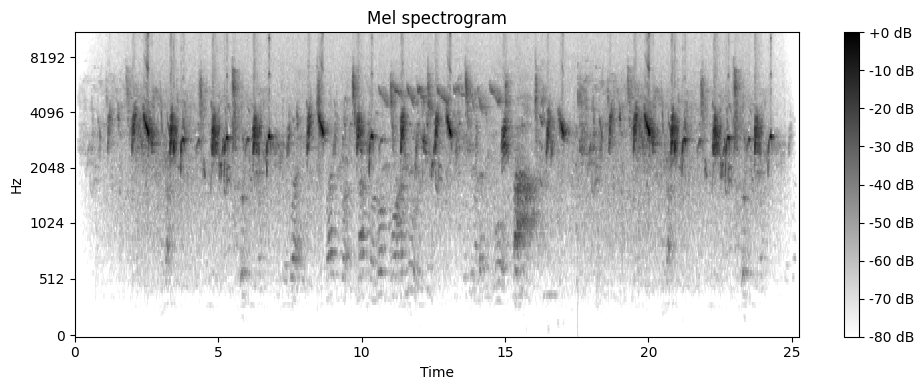

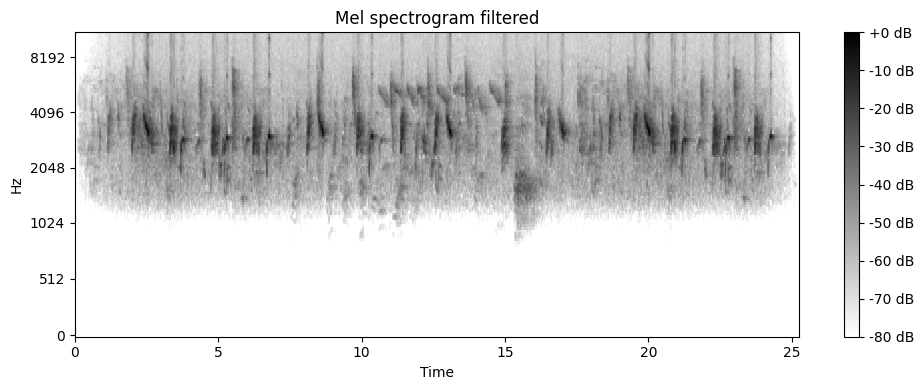

In [5]:
#Visualize both mel spectrograms using 
import matplotlib.pyplot as plt
import librosa.display

mel_spectrogram = librosa.feature.melspectrogram(y=np_audio, sr=32000, n_mels=128, fmax=8000)
mel_spectrogram_filtered = librosa.feature.melspectrogram(y=np_audio_filtered, sr=32000, n_mels=128, fmax=8000)

plt.figure(figsize=(10, 4))
#Use white black color
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_filtered, ref=np.max), y_axis='mel', x_axis='time', cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram filtered')
plt.tight_layout()


Text(0.5, 1.0, 'Mel spectrogram')

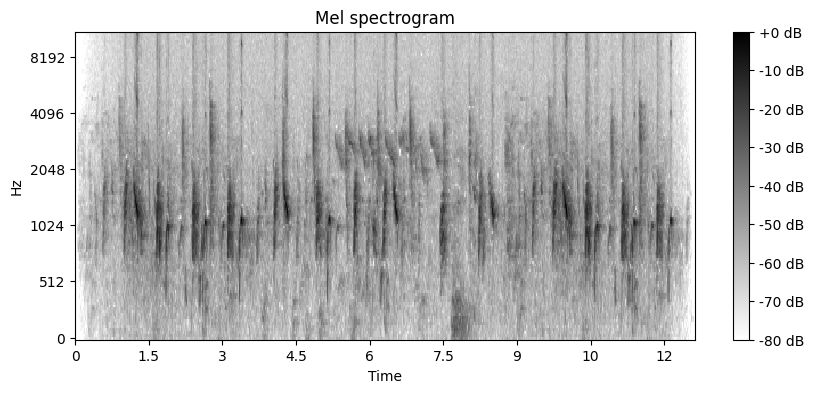

In [20]:
#Visualize both mel spectrograms using pytorch mel spectrogram
import torch
from torchaudio.transforms import MelSpectrogram

mel_transform = MelSpectrogram(sample_rate=32000, n_mels=128, f_max=8000, n_fft=2048, f_min=1250)
mel_spectrogram_torch = mel_transform(torch.tensor(np_audio).unsqueeze(0))
mel_spectrogram_filtered_torch = mel_transform(torch.tensor(np_audio_filtered).unsqueeze(0))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_torch.squeeze().numpy(), ref=np.max), y_axis='mel', x_axis='time', cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
